 # <center>数据的加载<center>
    
   “巧妇难为无米之炊”， 对于数据工作者来说数据便是所有数据工作的基础。如果不能将想要的数据导入导出$python$，那我们学到的一切用来处辅助处理数据的工具就没什么用了。现实中工作中，数据的来源十分复杂。
    
   1.从数据**结构类型**上来讲，包括**结构化**和**非结构化**数据；
   
   2.从数据**来源方式**来分， 既有**导出的数据文件、 数据库等常见来源， 又有流式、 API等复杂系统接口**和**外部资源**数据。
   
   本课件主要用于介绍利用各种库来读取各种读取数据结构的知识。

## 1. 从文本文件读取数据

### 1.1 使用read、 readline、 readlines读取数据

Python可以读取任意格式的文本数据， 使用Python读取文本数据的基本步骤是：

1） 定义数据文件；

2） 获取文件对象；

3） 读取文件内容；

4） 关闭文件对象。

**1) 定义数据文件**

定义数据文件即定义要读取的文件， 该步骤不是必须的， 可以跟“获取文件对象”整合。 但为了后续操作的便捷性、 全局数据对象的可维护性以及减少代码冗余， 建议读者将数据文件预先赋值给一个对象。定义文本数据文件的方法是：

<center>file_name = [文件名称]<center>

例如：
    <center>file_name = 'd:/python_data/data/text.txt'<center>

**注意:**

文件名称中可以只写文件名， 此时默认Python读取当前工作目录下的文件； 也可以加入路径， 默认使用斜杠， 尤其是Windows下要注意用法。

**2) 获取文件对象**

获取文件对象的意义是基于数据文件产生对象， 后续所有关于该数据文件的操作都基于该对象产生。

语法：

<center>file object = open(name, mode='r', buffering=-1, encoding=None, errors=None,newline=None, closefd=True, opener=None)<center>

参数：

·file: 要读取的文件名称， 即上一个环节定义的file_name， 必填。

·mode: 打开文件的模式， 选填， 在实际应用中， r、 r+、 w、 w+、a、 a+是使用最多的模式。

·buffering: 指定了读写文件的缓存模式。0表示不缓存，1表示缓存，如大于1则表示缓冲区的大小。默认值是缓存模式。

·encoding: 指定对文本进行编码和解码的方式，只适用于文本模式，可以使用Python支持的任何格式，如GBK、utf8、CP936等等。

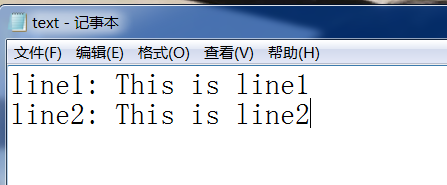

例如：
<center>file_name = 'text.txt'<center>
    
<center>file_object = open(file_name)<center>


在“定义数据文件”部分提到可以将前两个环节结合起来， 定义的语法是：

<center>file_object = open('text.txt')<center>
    
**3） 读取文件内容**

$python$基于文件对象的读取分为3种方法， 如下表所示：

| 方法 | 功能说明 |
|:-----------:| :-----------:|
| read([size]) | 从文本文件中读取size个字符（Python 3.x）的内容作为结果返回，或从二进制文件中读取指定数量的字节并返回，如果省略size则表示读取所有内容 |
| readline() | 从文本文件中读取一行内容作为结果返回 |
| readlines() | 把文本文件中的每行文本作为一个字符串存入列表中，返回该列表 |

假如有一个名为“text.txt”的数据文件， 其中包含2个文本行， 数据内容如下图所示。

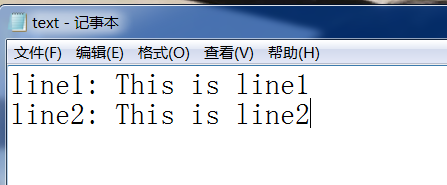

·通过read方法读取该数据文件得到的数据结果：

In [1]:
with open('text.txt') as f:
    txt=f.read()
txt

'line1: This is line1\nline2: This is line2'

·通过readline方法读取该数据文件得到的数据结果：

In [2]:
with open('text.txt') as f:
    txt=f.readline()
txt

'line1: This is line1\n'

·通过readlines方法读取该数据文件得到的数据结果：

In [3]:
with open('text.txt') as f:
    txt=f.readlines()
txt

['line1: This is line1\n', 'line2: This is line2']

**注意：**

现实中read方法和readlines方法比较常用， 而且二者都能读取全部文件中的数据。 二者的区别只是**返回的数据类型**不同， 前者返回**字符串**， 适用于所有行都是完整句子的文本文件。例如大段文字信息； 后者返回**列表**， 适用于每行是一个单独的数据记录， 例如日志信息。 不同的读取方法会直接影响后续基于内容的处理应用； readline由于每次只读取一行数据， 因此通常需要配合seek、 next等指针操作才能完整遍历读取所有数据记录。

**4） 关闭文件内容**

每次使用完数据对象之后， 需要关闭数据对象。 方法是file_object.close（） 。

**5） 上下文管理语句with**

实际运用中，读写文件时应该优先考虑使用上下文管理语句with，关键字with可以自动管理资源，不论什么原因（哪怕是代码引发异常）跳出with块，总能保证文件被正确关闭，可以在代码执行完毕后自动还原进入该代码块时的上下文，常用于文件操作、数据库连接、网络连接、多线程与多进程同步时的锁对象管理等场合。

语法：
```python
with open(filename, mode, encoding) as fp:
    #这里写通过文件对象fp读写文件内容的语句
```

**相关知识点： 指针**

Python文件操作中的指针类似于Word操作中的光标， 指针所处的位置就是光标的位置， 它决定了Python的读写从哪里开始。 默认情况下，当通过open函数打开文件时， 文件的指针处于第一个对象的位置。 因此， 在上述通过readline读取文件内容时， 获取的是第一行数据。 仍然是上面示例中的数据文件， 我们通过如下代码演示基于不同指针位置读取的内容：

In [4]:
fn = open('text.txt')# 获得文件对象
print (fn.tell())# 输出指针位置
line1 = fn.readline()# 获得文件第一行数据
print (line1) # 输出第一行数据
print (fn.tell())# 输出指针位置
line2 = fn.readline()# 获得文件第二行数据
print (line2)# 输出第二行数据
print (fn.tell())# 输出指针位置
fn.close() # 关闭文件对象

0
line1: This is line1

22
line2: This is line2
42


从返回结果看： 当打开文件时， 文件指针的位置处于文件开头， 输出为0； 当读取完第一行之后， 文件指针位置处于第一行行末， 位置是第22个字符后面（也就是'\n'后面， '\n'是换行符） ； 当读取完第二行（最后一行） 之后， 文件指针位置处于第二行行末， 位置是第42个字符后面（注意： 由于是最后一行， 没有换行符'\n'） 。

**理论上， Python可以读取任意格式的文件， 但在这里通常以
读取格式化的文本数据文件为主， 其中包括txt、 csv、 tsv等格式的文
件， 以及有固定分隔符分隔并以通用数据编码和字符集编码（例如
utf8、 ASCII、 GB2312等） 存放的无扩展名格式的数据文件。**

### 1.2使用Numpy的loadtxt、 load、 fromfile读取数据

Numpy读取数据的方法包括loadtxt、 load和fromfile等3种， 概要描述如下表所示。

| 方法 | 描述 |返回数据 |
|:-----------:| :-----------:|:-----------:|
| loadtxt | 从txt文本中读取数据|从文件中读取的数组|
| load|使用Numpy的load方法可以读取Numpy专用的二进制数据文件，从npy. npz或pickled文件加载数组或pickled对象|从数据文件中读取的数组、元组、字典等|
| fromfile| 使用Numpy的fomfile方法可以读取简单的文本文件数据以及二进制数|从文件中读取的数据|

**1）使用loadtxt方法读取数据文件**

Numpy可以读取txt格式的数据文件， 数据通常都是一维或二维的。**文本文件中的每一行必须含有相同的数据**。

语法：
<center>loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)<center>

**参数：**

·fname： 文件或字符串， 必填， 这里指定要读取的文件名称或字符串， 支持压缩的数据文件， 包括gz和bz格式。

·dtype： 数据类型， 选填， 默认为float（64位双精度浮点数） 。

·comments： 字符串或字符串组成的列表， 是表示注释字符集开始的标志， 选填， 默认为#。

·delimiter： 字符串， 选填， 用来分割多个列的分隔符， 例如逗号、TAB符， 默认值为空格。

·converters： 字典， 选填， 用来将特定列的数据转换为字典中对应的函数的浮点型数据， 例如将空值转换为0， 默认为空。

·skiprows： 跳过特定行数据， 选填， 用来跳过特定前N条记录， 例如跳过前1行（可能是标题或注释） ， 默认为0。

·usecols： 元组， 选填， 用来指定要读取数据的列， 第一列为0， 以此类推， 例如（1， 3， 5） ， 默认为空。

·unpack： 布尔型， 选填， 用来指定是否转置数组， 如果为真则转置， 默认为False。

·ndmin： 整数型， 选填， 用来指定返回的数组至少包含特定维度的数组， 值域为0/1/2， 默认为0。


返回： 从文件中读取的数组。


假如有一个名为numpy_data.txt的数据文件， 数据为3行5列的矩阵， 数据内容如下图所示， 该示例通过loadtxt方法读取其中的数据。
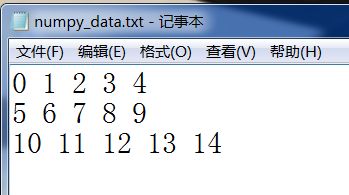

In [5]:
import numpy as np # 导入Numpy库
file_name = 'numpy_data.txt' # 定义数据文件
data = np.loadtxt(file_name, dtype='float32', delimiter=' ') # 获取数据
print (data) # 打印数据

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]]


**2）使用load方法读取数据文件**

使用Numpy的load方法可以读取Numpy专用的二进制数据文件， 从npy、 npz或pickled文件加载数组或pickled对象， 该文件通常基于Numpy的save或savez等方法产生。

**语法：**

<center>load(file, mmap_mode=None, allow_pickle=False, fix_imports=True,encoding='ASCII')<center>
    
参数：

·file:类文件对象或字符串格式， 要读取的文件或字符串， 必填，类文件对象需要支持seek()和read()方法。pickle文件需要类似文件的对象也支持 readline()方法

·mmap_mode： 内存映射模式， 值域为None、 'r+'、 'r'、 'w+'、 'c'， 选填。

·allow_pickle： 布尔型， 选填， 决定是否允许加载存储在npy文件中的pickled对象数组， 默认值为False。

·fix_imports： 布尔型， 选填， 如果为True， pickle将尝试将旧的Python 2名称映射到Python 3中并使用新名称， 仅在Python 3上加载Python 2中生成的pickled files文件时才有用，这些文件包含对象组的py/npz文件。

·encoding： 字符串， 决定读取Python 2字符串时使用何种编码， 选填。

返回： 从数据文件中读取的数组、 元组、 字典等。

例：先定义一份数据， 然后保存名为load_data.npy,接着使用Numpy的load方法读取并打印输出。 代码如下：

In [6]:
import numpy as np # 导入nump库
write_data = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])# 定义要存储的数据
np.save('load_data', write_data) # 保存为npy数据文件
read_data = np.load('load_data.npy') #读取npy文件
print (read_data)# 输出读取的数据

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


**3） 使用fromfile方法读取数据文件**

使用Numpy的fromfile方法可以读取简单的文本文件数据以及二进制数据。 通常情况下， 该方法读取的数据来源于Numpy的tofile方法， 即通过Numpy的tofile方法将特定数据保存为文件（默认为二进制数据文件， 无论文件扩展名如何定义） ， 然后通过fromfile方法读取该二进制文件。

语法：
<center>fromfile(file, dtype=float, count=-1, sep='', offset=0)<center>
    
·file： 打开文件对象或文件名。

·dtype： 返回数组的数据类型。对于二进制文件，它用于确定文件中各项的大小和字节顺序

·count： 要读取的项目数。-1表示所有项目（即完整文件）。

·sep： 字符串， 如果file是一个文本文件， 那么该值就是数据间的分隔符。 如果为空（""） 则意味着file是一个二进制文件， 多个空格将按照一个空格处理。

·int:与文件当前位置的偏移量（以字节为单位）。默认值为0。仅允许用于二进制文件。

返回： 从文件中读取的数据。

**示例：**
以numpy_data.txt数据文件为例， 首先通过tofile方法创建1个二进制文件， 然后对该文件进行读取。

In [7]:
import numpy as np # 导入Numpy库
file_name = 'numpy_data.txt' # 定义数据文件
data = np.loadtxt(file_name, dtype='float32', delimiter=' ') # 获取数据
print(data)
tofile_name = 'binary' # 定义导出二进制文件名
data.tofile(tofile_name) # 导出二进制文件
fromfile_data = np.fromfile(tofile_name, dtype='float32') # 读取二进制文件
print (fromfile_data) # 打印数据

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


**注意：请务必确保读入文件跟存储文件时的数据类型一致， 否则将导致数据报错。**

由于使用tofile方法保存的数据会丢失数据形状信息， 因此导入时无法重现原始数据矩阵。

如在使用fromfile导入数据时，不指定float32格式， 看下输出结果：

In [8]:
import numpy as np # 导入Numpy库
file_name = 'numpy_data.txt' # 定义数据文件
data = np.loadtxt(file_name, dtype='float32', delimiter=' ') # 获取数据
tofile_name = 'binary' # 定义导出二进制文件名
data.tofile(tofile_name) # 导出二进制文件
fromfile_data = np.fromfile(tofile_name) # 读取二进制文件
print (fromfile_data) # 打印数据

[7.81250000e-03 3.20000076e+01 2.04800049e+03 3.27680079e+04
 2.62144063e+05 1.04857625e+06 4.19430502e+06]


### 1.3使用Pandas的read_csv、 read_fwf、 read_table读取数据

Pandas读取文本文件数据的常用方法如下表所示。

| 方法 | 描述 |返回数据 |
|:-----------:| :-----------:|:-----------:|
| read_csv | 读取csv文件|DataFrame或TextParser|
|read_fwf|读取表格或固定宽度格式的文本行到数据框|DataFrame或TextParser|
| read_table| 读取通用分隔符分隔的数据文件到数据框|DataFrame或TextParser|


**1） 使用read_cvs方法读取数据**

通过read_csv方法可以读取csv格式的数据文件。

语法：
<center>read_csv(filepath_or_buffer, sep=',', header='infer', names=None, skiprows=None, nrows=None,  thousands=None, decimal=b'.' )<center>

参数  （read_csv的参数众多， 以下仅介绍最常用的几个参数）
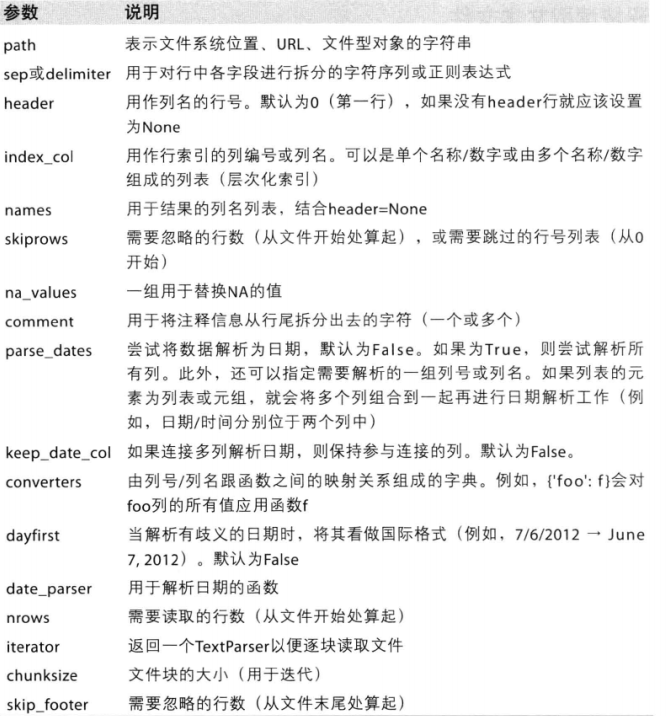
返回： DataFrame或TextParser。




In [9]:
import pandas
#help(pandas.read_csv)

 **示例：**

以csv_data.csv数据文件为例，直接读取文件并打印输出。 

In [10]:
import pandas as pd # 导入Pandas库
csv_data = pd.read_csv('csv_data.csv', names=['col1', 'col2', 'col3', 'col4', 'col5']) # 读取csv数据
print (csv_data) # 打印输出数据

   col1  col2  col3  col4  col5
0     0     1     2     3     4
1     5     6     7     8     9
2    10    11    12    13    14


**2） 使用read_fwf方法读取数据**

通过read_fwf方法可以读取表格或固定宽度格式的文本行到数据框。

语法：

<center>read_fwf(filepath_or_buffer, colspecs='infer', widths=None, **kwds)<center>
    
参数： 

read_fwf跟read_csv一样都具有非常多的参数（只是在语法中前者通过\*\*kwds省略了， 查询完整语法请使用help(pd.read_fwf),并且大多数参数的用法

相同。 除了read_csv中的常用参数外， 以下仅介绍read_fwf特有且常用的参数。

·widths： 由整数组成的列表， 选填， 如果间隔是连续的， 可以使用的字段宽度列表而不是“colspecs”。

返回： DataFrame或TextParser。


例如：

以fwf_data数据文件为例，直接读取文件并打印输出。文件中数据的内容如下：

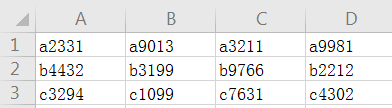

In [11]:
import pandas as pd # 导入Pandas库
fwf_data = pd.read_fwf('fwf_data.csv', widths=[5, 5, 5, 5], names=
['col1', 'col2', 'col3', 'col4']) # 读取csv数据
print (fwf_data) # 打印输出数据

    col1   col2   col3   col4
0  a2331  ,a901  3,a32  11,a9
1  b4432  ,b319  9,b97  66,b2
2  c3294  ,c109  9,c76  31,c4


In [12]:
#help(pd.read_fwf)

**3） 使用read_table方法读取数据**

通过read_table方法可以读取通用分隔符分隔的数据文件到数据框。

语法：
<center>read_table(filepath_or_buffer, sep='\t', delimiter=None, header='infer', names=None,**kwdse)<center>
    
参数： 

对于read_table而言,参数与read_csv完全相同。其实read_csv本来就是read_table中分隔符是逗号的一个特例， 表现在语法中是read_csv的sep=', '（默认）。因此，具体参数请查阅read_csv的参数部分。

返回： DataFrame或TextParser。

In [13]:
#help(pd.read_table)

In [14]:
#help(pd.read_csv)

示例： 以table_data.txt数据文件为例， 直接读取文件并打印输出。 数据内容如下图所示。

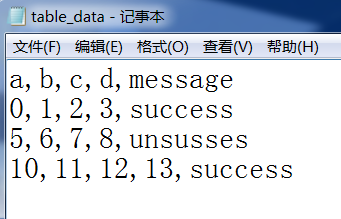

In [15]:
import pandas as pd # 导入Pandas库
table_data = pd.read_table('table_data.txt', sep=',') # 读取csv数据
print (table_data) # 打印输出数据

    a   b   c   d   message
0   0   1   2   3   success
1   5   6   7   8  unsusses
2  10  11  12  13   success


In [16]:
import pandas as pd # 导入Pandas库
table_data = pd.read_csv('table_data.txt') # 读取csv数据
print (table_data) # 打印输出数据

    a   b   c   d   message
0   0   1   2   3   success
1   5   6   7   8  unsusses
2  10  11  12  13   success


让pandas自动分配列名，或者自己定义列名。

In [17]:
import pandas as pd # 导入Pandas库
table_data = pd.read_table('table_data.txt', sep=',',names=
['col1', 'col2', 'col3', 'col4', 'col5']) # 读取csv数据
print (table_data) # 打印输出数据

  col1 col2 col3 col4      col5
0    a    b    c    d   message
1    0    1    2    3   success
2    5    6    7    8  unsusses
3   10   11   12   13   success


如果希望将message作为Dataframe的索引，通过index_col参数指定即可。

In [18]:
import pandas as pd # 导入Pandas库
table_data = pd.read_table('table_data.txt', sep=',',index_col='message') # 读取csv数据
print (table_data) # 打印输出数据

           a   b   c   d
message                 
success    0   1   2   3
unsusses   5   6   7   8
success   10  11  12  13


提示：如果有些表格不是用固定分隔符取分隔字段的。对于此种类型，可以编一个正则表达式作为read_table的分隔符。

示例：ex3中的数据如下所示：

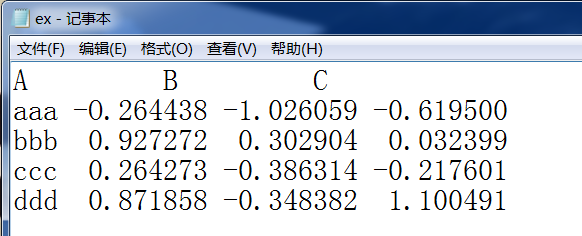

如果用open函数打开查看其数据时候，结果为：

In [19]:
list(open('ex.txt'))

['A         B         C\n',
 'aaa -O.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904  0.032399\n',
 'ccc  0.264273 -0.386314 -0.217601\n',
 'ddd  0.871858 -0.348382  1.100491\n']

此时，采用正则表达式即可将进行较好的处理。

In [20]:
table_data = pd.read_table('ex.txt', sep=r'\s+') # 读取csv数据
print(table_data) # 打印输出数据

             A         B         C
aaa  -O.264438 -1.026059 -0.619500
bbb   0.927272  0.302904  0.032399
ccc   0.264273 -0.386314 -0.217601
ddd   0.871858 -0.348382  1.100491


数据分割（或分列） 常用思路分为两种： 
一种是基于固定宽度， 一种是基于分割符号。 上述三种方法中， 常用的方法是第二和第三种， 即read_fwf和read_table方法。

补充：将数据写出到文本格式，直接用to_csv函数即可。具体用法请自行参考帮助文档。

## 2. 从Excel获取数据

现有的Excel分为两种格式： xls（Excel 97-2003） 和xlsx（Excel2007及以上） 。

Python处理Excel文件主要是第三方模块库xlrd(读取 Excel 文件)、 xlwt(向 Excel 文件写入，并设置格式)、 pyexcel-xls、xluntils(一组 Excel 高级操作工具（需要先安装 xlrd 和 xlwt）)和pyExcel-erator， 以及win32com和openpyxl模块， 此外Pandas中
也带有可以读取Excel文件的模块（read_excel） 。

 我们使用xlrd模块读取Excel数据。（因为anocoda中以及集成安装了各种库，所以我们不需要单独安装此库）
 
 
示例：以ratings.xlsx数据文件为例， 介绍该库的具体应用。 

数据形式大致是：

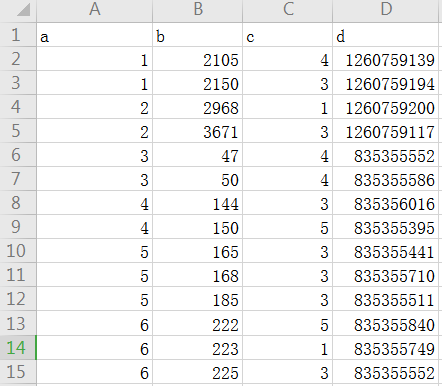

In [21]:
import xlrd # 导入库
# 打开文件
xlsx = xlrd.open_workbook('ratings.xlsx')
# 查看所有sheet列表
print ('All sheets: %s' % xlsx.sheet_names())
print ('===================================') # 内容分割线
# 查看sheet1的数据概况
sheet1 = xlsx.sheets()[0] # 获得第一张sheet， 索引从0开始
sheet1_name = sheet1.name # 获得名称
sheet1_cols = sheet1.ncols # 获得列数
sheet1_nrows = sheet1.nrows # 获得行数
print ('Sheet1 Name: %s\nSheet1 cols: %s\nSheet1 rows: %s' % (sheet1_name, sheet1_cols,sheet1_nrows))
print ('===================================') # 内容分割线
# 查看sheet1的特定切片数据
sheet1_nrows4 = sheet1.row_values(4) # 获得第4行数据
sheet1_cols2= sheet1.col_values(2) # 获得第2列数据
cell23 = sheet1.row(2)[3].value # 查看第3行第4列数据
print ('Row 4: %s\nCol 2: %s\nCell 1: %s\n' % (sheet1_nrows4, sheet1_cols2, cell23))
print ('===================================') # 内容分割线
# 查看sheet1的数据明细
for i in range(sheet1_nrows): # 逐行打印sheet1数据
    print (sheet1.row_values(i))

All sheets: ['ratings']
Sheet1 Name: ratings
Sheet1 cols: 4
Sheet1 rows: 15
Row 4: [2.0, 3671.0, 3.0, 1260759117.0]
Col 2: ['c', 4.0, 3.0, 1.0, 3.0, 4.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 5.0, 1.0, 3.0]
Cell 1: 1260759194.0

['a', 'b', 'c', 'd']
[1.0, 2105.0, 4.0, 1260759139.0]
[1.0, 2150.0, 3.0, 1260759194.0]
[2.0, 2968.0, 1.0, 1260759200.0]
[2.0, 3671.0, 3.0, 1260759117.0]
[3.0, 47.0, 4.0, 835355552.0]
[3.0, 50.0, 4.0, 835355586.0]
[4.0, 144.0, 3.0, 835356016.0]
[4.0, 150.0, 5.0, 835355395.0]
[5.0, 165.0, 3.0, 835355441.0]
[5.0, 168.0, 3.0, 835355710.0]
[5.0, 185.0, 3.0, 835355511.0]
[6.0, 222.0, 5.0, 835355840.0]
[6.0, 223.0, 1.0, 835355749.0]
[6.0, 225.0, 3.0, 835355552.0]


注意：由于Excel本身的限制和适用范围， 其无法存储和计算过大（例如千万级的数据记录） 的数据量， 并且Excel本身也不是为了海量数据的应用而产生的。 因此， Excel可用于日常基本数据处理、 补充数据来源或者汇总数据， 同时也可以作为数据结果展示的载体， 这种应用对于大量数值表格的展现效果非常好。